# DSAI Midterm Project : Predict Future Sales  
### Hsin-Yen Chien, RE6071088
### Institute of Data Science  
### Leader board Score = 0.94XXX

## Import Package

In [1]:
import numpy as np
import pandas as pd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
import gc
%matplotlib inline
gc.enable()

## Read all data

In [2]:
train = pd.read_csv('sales_train_v2.csv')
train = train.drop(columns=['date'], axis=1)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 5 columns):
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3)
memory usage: 112.0 MB


,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
2,0,25,2552,899.00,-1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0
5,0,25,2564,349.00,1.0
6,0,25,2565,549.00,1.0
7,0,25,2572,239.00,1.0
8,0,25,2572,299.00,1.0
9,0,25,2573,299.00,3.0


In [3]:
test  = pd.read_csv('test.csv').set_index('ID')
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(2)
memory usage: 4.9 MB


,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [4]:
items = pd.read_csv('items.csv')
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
shops = pd.read_csv('shops.csv')
shops.info()
shops

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [6]:
cats = pd.read_csv('item_categories.csv')
cats.info()
cats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


## Descriptive Statistics

Text(0.5, 0, 'shop_id')

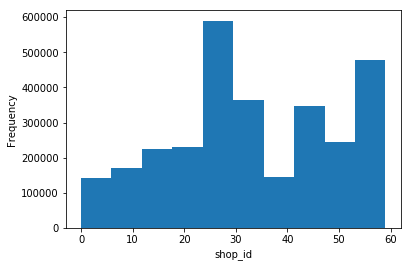

In [7]:
train.shop_id.plot.hist()
plt.xlabel("shop_id")

Text(0.5, 0, 'item_id')

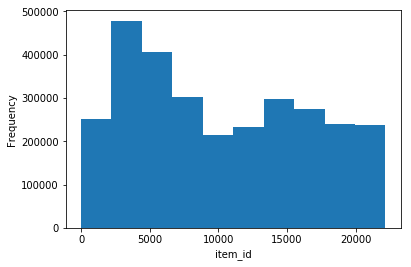

In [8]:
train.item_id.plot.hist()
plt.xlabel("item_id")

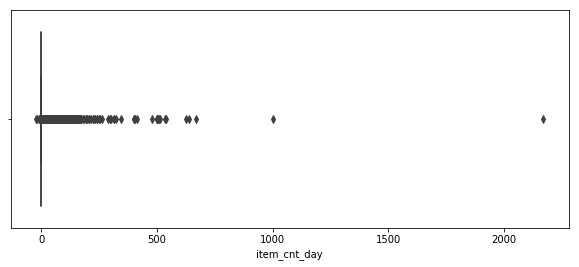

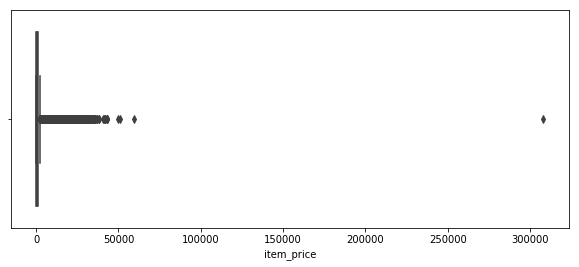

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)

## Data Preprocessing

### Data cleaning: Check outliers

In [10]:
train.nlargest(3, 'item_cnt_day')

,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,33,12,11373,0.908714,2169.0
2326930,24,12,20949,4.000000,1000.0
2864235,32,12,9248,1692.526158,669.0


In [11]:
train.nlargest(3, 'item_price')

,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,11,12,6066,307980.0,1.0
885138,8,12,11365,59200.0,1.0
1488135,14,25,13199,50999.0,1.0


In [12]:
train[train.item_price==307980.0]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,11,12,6066,307980.0,1.0


In [13]:
items[items.item_id==6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


We found that item6066 is an software called Radmin 3, and we consider that it's impossible cost that price.  
Hence, we remove it.

In [14]:
train = train[train.item_price<300000].astype(np.int32)
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935848 entries, 0 to 2935848
Data columns (total 5 columns):
date_block_num    int32
shop_id           int32
item_id           int32
item_price        int32
item_cnt_day      int32
dtypes: int32(5)
memory usage: 78.4 MB


,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,59,22154,999,1
1,0,25,2552,899,1
2,0,25,2552,899,-1
3,0,25,2554,1709,1
4,0,25,2555,1099,1


### Convert to Monthly Sales

In [15]:
data = []
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    data.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
    
data = pd.DataFrame(np.vstack(data), columns=cols)
data['date_block_num'] = data['date_block_num'].astype(np.int8)
data['shop_id'] = data['shop_id'].astype(np.int8)
data['item_id'] = data['item_id'].astype(np.int16)
data.sort_values(cols,inplace=True)

Count monthly total item_cnt_day, combine to train_monthly data and fill null sales records with 0.

In [16]:
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

data = pd.merge(data, group, on=cols, how='left')
data['item_cnt_month'] = (data['item_cnt_month']
                                .fillna(0)
                                .clip(0,20) # Clip target
                                .astype(np.float16))

## Feature Extraction

In [17]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)
data = pd.concat([data, test], ignore_index=True, sort=False, keys=cols)
data.fillna(0, inplace=True) # 34 month

### Shop City

In [18]:
shop_city = []
for shop in shops.shop_name:
    city = shop.split()[0]
    shop_city.append(city)
shop_city[0] = 'Якутск'
shop_city[1] = 'Якутск'

In [19]:
def shopcity(data, citylist):
    cities = []
    for shopid in data.shop_id:
        cities.append(citylist[shopid])
    return cities
data['shop_city'] = shopcity(data, shop_city)
del shop_city

### Item category & type

In [20]:
from sklearn.preprocessing import LabelEncoder
cats['split'] = cats['item_category_name'].str.split('-')
cats['type_split'] = cats['split'].map(lambda x: x[0].strip())
cats['type'] = LabelEncoder().fit_transform(cats['type_split'])
cats['subtype_split'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats['subtype'] = LabelEncoder().fit_transform(cats['subtype_split'])
cats = cats[['item_category_id','type', 'subtype']]
cats = cats.to_dict('split')

In [21]:
items = items.drop(columns=['item_name'], axis=1)
items = items.to_dict('split')

In [22]:
def itemcategory(data):
    item_categories = []
    for item in data.item_id:
        item_categories.append(items['data'][item][1])
    return item_categories
data['item_category'] = itemcategory(data)

def itemtype(data):
    item_type = []
    item_subtype = []
    for cat in data.item_category:
        item_type.append(cats['data'][cat][1])
        item_subtype.append(cats['data'][cat][2])
    return item_type, item_subtype
data['item_type'], data['item_subtype'] = itemtype(data)

### Month

In [23]:
data['month'] = data['date_block_num'] % 12 + 1

### Lags
Some features in training data don't exist in testing data, and these features usually are periodical.  
So, we can "lag" these feature.

In [24]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [25]:
data = lag_feature(data, [1,2,3,4,5,6], 'item_cnt_month')

### Average of sales cnt per month with lags
We also fill null item price records with 0.

In [26]:
group = data.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num'], how='left')
data['date_avg_item_cnt'] = data['date_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1], 'date_avg_item_cnt')
data.drop(['date_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month & shop with lags

In [27]:
group = data.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num','shop_id'], how='left')
data['date_shop_avg_item_cnt'] = data['date_shop_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1,2,3,4,5,6], 'date_shop_avg_item_cnt')
data.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month & item with lags

In [28]:
group = data.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num','item_id'], how='left')
data['date_item_avg_item_cnt'] = data['date_item_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1,2,3,4,5,6], 'date_item_avg_item_cnt')
data.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month & item_category with lags

In [29]:
group = data.groupby(['date_block_num', 'item_category']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num','item_category'], how='left')
data['date_cat_avg_item_cnt'] = data['date_cat_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1], 'date_cat_avg_item_cnt')
data.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month ,shop and item_category with lags

In [30]:
group = data.groupby(['date_block_num', 'shop_id', 'item_category']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num', 'shop_id', 'item_category'], how='left')
data['date_shop_cat_avg_item_cnt'] = data['date_shop_cat_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1], 'date_shop_cat_avg_item_cnt')
data.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month & city with lags

In [31]:
group = data.groupby(['date_block_num', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num', 'shop_city'], how='left')
data['date_city_avg_item_cnt'] = data['date_city_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1], 'date_city_avg_item_cnt')
data.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

### Average of sales cnt per month, item and city with lags

In [32]:
group = data.groupby(['date_block_num', 'item_id', 'shop_city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num', 'item_id', 'shop_city'], how='left')
data['date_item_city_avg_item_cnt'] = data['date_item_city_avg_item_cnt'].astype(np.float16)
data = lag_feature(data, [1], 'date_item_city_avg_item_cnt')
data.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

### Price Trend for the last 6 months

In [33]:
group = train.groupby(['item_id']).agg({'item_price': ['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['item_id'], how='left')
data['item_avg_item_price'] = data['item_avg_item_price'].astype(np.float16)

group = train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)

data = pd.merge(data, group, on=['date_block_num','item_id'], how='left')
data['date_item_avg_item_price'] = data['date_item_avg_item_price'].astype(np.float16)

lags = [1,2,3,4,5,6]
data = lag_feature(data, lags, 'date_item_avg_item_price')

for i in lags:
    data['delta_price_lag_'+str(i)] = \
        (data['date_item_avg_item_price_lag_'+str(i)] - data['item_avg_item_price']) / data['item_avg_item_price']

def select_trend(row):
    for i in lags:
        if row['delta_price_lag_'+str(i)]:
            return row['delta_price_lag_'+str(i)]
    return 0
    
data['delta_price_lag'] = data.apply(select_trend, axis=1)
data['delta_price_lag'] = data['delta_price_lag'].astype(np.float16)
data['delta_price_lag'].fillna(0, inplace=True)

features_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    features_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    features_to_drop += ['delta_price_lag_'+str(i)]

data.drop(features_to_drop, axis=1, inplace=True)

## Modeling

### Final preparation

In [34]:
data = data.fillna(0)
X = data.drop(['item_cnt_month'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11128004 entries, 0 to 11128003
Data columns (total 32 columns):
date_block_num                       int8
shop_id                              int8
item_id                              int16
shop_city                            object
item_category                        int64
item_type                            int64
item_subtype                         int64
month                                int8
item_cnt_month_lag_1                 float16
item_cnt_month_lag_2                 float16
item_cnt_month_lag_3                 float16
item_cnt_month_lag_4                 float16
item_cnt_month_lag_5                 float16
item_cnt_month_lag_6                 float16
date_avg_item_cnt_lag_1              float16
date_shop_avg_item_cnt_lag_1         float16
date_shop_avg_item_cnt_lag_2         float16
date_shop_avg_item_cnt_lag_3         float16
date_shop_avg_item_cnt_lag_4         float16
date_shop_avg_item_cnt_lag_5         float16
dat

### Apply One hot encoder to Categories & Scale Numerical data 

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
temp = []
temp.append(0)
temp.extend([i+8 for i in range(24)])
CT = ColumnTransformer([('cat', OneHotEncoder(), [1,2,3,4,5,6,7]), ('num', StandardScaler(), temp)])
CT.fit_transform(X)

/usr/lib64/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, float16 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib64/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int8, float16 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<11128004x22466 sparse matrix of type '<class 'numpy.float64'>'
	with 356096128 stored elements in Compressed Sparse Row format>

Use latest 12 months data to train model.

In [41]:
rundata = data[data.date_block_num > 21]
X_train = rundata[rundata.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = rundata[rundata.date_block_num < 33]['item_cnt_month']
X_valid = rundata[rundata.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = rundata[rundata.date_block_num == 33]['item_cnt_month']
X_test = rundata[rundata.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [42]:
X_train = CT.transform(X_train)
X_valid = CT.transform(X_valid)
X_test = CT.transform(X_test)

/usr/lib64/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int8, float16 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
/usr/lib64/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int8, float16 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)
/usr/lib64/python3.6/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype int8, float16 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


### Release the memory

In [38]:
del train
#del data
#del X
gc.collect()

88

### Extreme Gradient Boosting (Xgboost)

In [43]:
from xgboost import XGBRegressor, plot_importance
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3, seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, early_stopping_rounds = 10)

/home/moneychien/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/moneychien/.local/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:1.17654	validation_1-rmse:1.12497
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.13359	validation_1-rmse:1.09034
[2]	validation_0-rmse:1.09514	validation_1-rmse:1.06219
[3]	validation_0-rmse:1.05692	validation_1-rmse:1.0401
[4]	validation_0-rmse:1.02056	validation_1-rmse:1.02262
[5]	validation_0-rmse:0.99408	validation_1-rmse:1.00635
[6]	validation_0-rmse:0.976604	validation_1-rmse:0.993791
[7]	validation_0-rmse:0.95702	validation_1-rmse:0.982673
[8]	validation_0-rmse:0.940088	validation_1-rmse:0.972919
[9]	validation_0-rmse:0.928049	validation_1-rmse:0.965984
[10]	validation_0-rmse:0.917534	validation_1-rmse:0.958818
[11]	validation_0-rmse:0.908705	validation_1-rmse:0.954009
[12]	validation_0-rmse:0.900922	validation_1-rmse:0.950052
[13]	validation_0-rmse:0.894334	validation_1-rmse:0.945834
[14]	validation_0-rmse:0.886784	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=300, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=0.8)

In [40]:
Y_test = model.predict(X_test)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)